In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

Read the dataframe and rename the columns. We don't need feature scaling because the random forest will not be affected by not doing so.

In [3]:
header_list = ['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]','NssssC', 'nCb-', 'C%', 'nCp', 'nO', 'F03[C-N]',
               'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L', 'F03[C-O]', 'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)', 
              'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'SpMax_A', 'Psi_i_1d', 'B04[C-Br]', 'SdO' , 'TI2_L', 'nCrt',
               'C-026', 'F02[C-N]', 'nHDon', 'SpMax_B(m)', 'Psi_i_A', 'nN', 'SM6_B(m)', 'nArCOOR', 'nX', 'TARGET']
df = pd.read_csv('BioDegData.csv', names = header_list)
X, y = df.iloc[:, 0:-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

Apply a RandomForestRegressor to find a set of most significant features.

 1) SpMax_B(m)                     0.272272
 2) SpMax_L                        0.056210
 3) SpPosA_B(p)                    0.051055
 4) Psi_i_A                        0.043018
 5) Mi                             0.038557
 6) F02[C-N]                       0.037755
 7) SM6_B(m)                       0.037714
 8) SdssC                          0.035506
 9) nN                             0.034265
10) SpMax_A                        0.032200
11) SdO                            0.031823
12) J_Dz(e)                        0.031405
13) HyWi_B(m)                      0.023663
14) nCp                            0.023462
15) LOC                            0.023115
16) TI2_L                          0.022513
17) Me                             0.022283
18) C%                             0.021099
19) F03[C-O]                       0.020448
20) SM6_L                          0.019571
21) nArCOOR                        0.019237
22) Psi_i_1d                       0.018879
23) nO                          

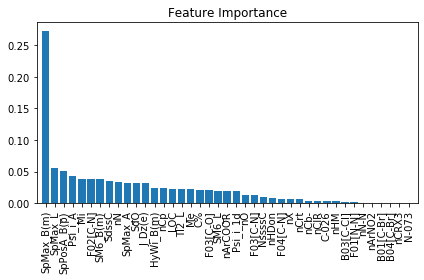

In [6]:
forest = RandomForestRegressor(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
features = df.columns[0:-1]
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            features[indices[f]],
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('figs/FeatureImportances.png', dpi=300)

sfm = SelectFromModel(forest, threshold=0.03, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet threshold of 0.03 is', X_selected.shape[1], 'including')
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, features[indices[f]], importances[indices[f]]))